In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
'''
Data Information:-
The datasets consist of several medical predictor (independent) variables and one target (dependent) variable, 
Outcome. Independent variables include the number of pregnancies the patient has had, their BMI, insulin level, 
age, and so on.

Attribute information :-
Pregnancies - Number of times pregnant
Glucose - Plasma glucose concentration a 2 hours in an oral glucose tolerance test
BloodPressure - Diastolic blood pressure (mm Hg)
SkinThickness - Triceps skin fold thickness (mm)
Insulin - 2-Hour serum insulin (mu U/ml)
BMI - Body mass index (weight in kg/(height in m)^2)
DiabetesPedigreeFunction - Diabetes pedigree function
Age - Age (years)
Outcome - Class variable (0 or 1) 268 of 768 are 1, the others are 0

'''

In [5]:
df_diabetes = pd.read_csv('pima-indians-diabetes.data')
df_diabetes.head()

,6,148,72,35,0,33.6,0.627,50,1
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


In [6]:
# lets change the column names as per the attribute information given

df_diabetes.rename(columns={'6':'pregnant', '148':'glucose', '72':'bp', '35':'skin', 
                            '0':'insulin', '33.6':'bmi', '0.627':'pedigree', 
                            '50':'age','1':'label'},inplace=True)


In [7]:
df_diabetes.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


In [8]:
df_diabetes.shape

(767, 9)

In [22]:
df_diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 767 entries, 0 to 766
Data columns (total 9 columns):
pregnant    767 non-null int64
glucose     767 non-null int64
bp          767 non-null int64
skin        767 non-null int64
insulin     767 non-null int64
bmi         767 non-null float64
pedigree    767 non-null float64
age         767 non-null int64
label       767 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [27]:
# null values
df_diabetes.isnull().sum()

pregnant    0
glucose     0
bp          0
skin        0
insulin     0
bmi         0
pedigree    0
age         0
label       0
dtype: int64

In [10]:
## lets check the proportion of observations in the dataset, interms of diabetic and non-diabetic charecteristics
df_diabetes['label'].value_counts()

0    500
1    267
Name: label, dtype: int64

In [ ]:
'''the dataset has 267 records that has the combination of charecteristics that of a diabetic person, lets observe
the statistical summary for individual classes and understand the medical condition of a diabetic and non-diabetic
individuals.'''

In [12]:
grp = df_diabetes.groupby('label')

In [14]:
diabetic_grp    = grp.get_group(1)
nondiabetic_grp = grp.get_group(0)

In [17]:
diabetic_grp.describe()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
count,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.0
mean,4.861423,141.232210,70.820225,22.116105,100.711610,35.148315,0.550213,37.018727,1.0
std,3.747617,31.996922,21.532051,17.695354,138.812807,7.275990,0.373024,10.960096,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.088000,21.000000,1.0
25%,1.500000,119.000000,66.000000,0.000000,0.000000,30.800000,0.262000,28.000000,1.0
50%,4.000000,140.000000,74.000000,27.000000,0.000000,34.300000,0.447000,36.000000,1.0
75%,8.000000,167.000000,82.000000,36.000000,167.500000,38.850000,0.729000,44.000000,1.0
max,17.000000,199.000000,114.000000,99.000000,846.000000,67.100000,2.420000,70.000000,1.0


In [19]:
len(diabetic_grp[diabetic_grp['age']==21])

5

In [24]:
len(diabetic_grp[diabetic_grp['bmi']==0])

2

In [23]:
df_diabetes.corr()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
pregnant,1.000000,0.128846,0.141197,-0.082495,-0.072999,0.017518,-0.033927,0.544018,0.221087
glucose,0.128846,1.000000,0.152498,0.056381,0.332383,0.220955,0.136903,0.262408,0.465856
bp,0.141197,0.152498,1.000000,0.207308,0.089098,0.281777,0.041180,0.239571,0.064882
skin,-0.082495,0.056381,0.207308,1.000000,0.437974,0.392553,0.183498,-0.115873,0.073265
insulin,-0.072999,0.332383,0.089098,0.437974,1.000000,0.198111,0.185579,-0.040942,0.131984
bmi,0.017518,0.220955,0.281777,0.392553,0.198111,1.000000,0.140546,0.035911,0.292695
pedigree,-0.033927,0.136903,0.041180,0.183498,0.185579,0.140546,1.000000,0.032738,0.173245
age,0.544018,0.262408,0.239571,-0.115873,-0.040942,0.035911,0.032738,1.000000,0.236417
label,0.221087,0.465856,0.064882,0.073265,0.131984,0.292695,0.173245,0.236417,1.000000


In [ ]:
'''


diabetic patient charecteristics :-

1.Maximum of the diabetic patients are exhibiting glucose levels between the range 119-167,maximum glucose level 
observed is 199.

2.Maximum diabetic patients have sistolic blood pressure between 66-82 mm Hg

3.It also can be observed that the age group of maximum patients is between 28-44 years of age, where as the minimum
age is 21, there are 5 such young patients, we can also say that no one below 21 has diabetic charecteristics as per
this data(therefore there is no symmetrical age data, data is right skewed).

4.The patients have insulin charecteristics between 0-167.5 mu U/ml,
also we can observe that 25% of this diabetic data has insulin levels as 0(irrespective of the varied range), 
therefore the mean value is at 100,which means there are very less diabetic patients who have high insulin levels, 
as per this dataset, we can say that the target 'diabetic level' is less correlated with insulin level(as above,0.13)

5.The bmi that diabetic patients exihibit is between the range 30.8-38.8  

FACT - A BMI between 25 and 29.9 indicates that a person is carrying excess weight. 
       A BMI of 30 or over suggests that a person may have obesity
       
Based on the above facts we can conclude that obesity can be a very important factor causing diabetes

6.Also another observation regarding the BMI of diabetic patients is that of having a minimum bmi as 0 which
can contribute to a weakened immune system, fragile bones and feeling tired , there are tw such exceptional cases,
they can be termed as outliers which can be extremely helpful for doctors in understanding this unconventional results.

whereas looking at the mean value of 35 we can say there is high dominance of obesity leading to diabetes.

'''

In [25]:
nondiabetic_grp.describe()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
count,500.000000,500.0000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.0
mean,3.298000,109.9800,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000,0.0
std,3.017185,26.1412,18.063075,14.889947,98.865289,7.689855,0.299085,11.667655,0.0
min,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.0
25%,1.000000,93.0000,62.000000,0.000000,0.000000,25.400000,0.229750,23.000000,0.0
50%,2.000000,107.0000,70.000000,21.000000,39.000000,30.050000,0.336000,27.000000,0.0
75%,5.000000,125.0000,78.000000,31.000000,105.000000,35.300000,0.561750,37.000000,0.0
max,13.000000,197.0000,122.000000,60.000000,744.000000,57.300000,2.329000,81.000000,0.0


In [32]:
len(nondiabetic_grp[nondiabetic_grp['glucose']>140])

60

In [33]:
len(nondiabetic_grp[nondiabetic_grp['bmi']>35])

129

In [35]:
len(nondiabetic_grp[(nondiabetic_grp['bmi']>35) & (nondiabetic_grp['glucose']>140)])

19

In [ ]:
'''

non-diabetic patients charecteristics :-

1.The glucose level that maximum non-diabetic people are exhibiting is between 93-125, where as in the above diabetic
case we have seen that people above 119 have diabetes, these non diabetic people above 119 might just 
have high glucose but are not diabetic, so glucose though an important factor, can't be considered as an 
efficient factor to diagnose diabetes alone, as per this observation.

2. where as we can observe that the mean glucose level for the non biabetic group is 109 , which is clearly below 119
the conventional standard for having diabetes, from this we can say that the above 119 values that we have seen are
just extreme values but doesnot constitute the majority category

3. From above we have seen that there are 60 such non diabetic people who have glucose levels greater than that of 
average glucose level of diabetic patients

4. The bmi range for non diabetic people is 25-35, where as above 30 leads to obesity and has been observed previously
that its the charecteristic that's prominent in diabetic people(there are 129 such non diabetic people who have
high bmi)

5.Together we can observe that there are 19 such non diabetic people who have similar bmi and glucose levels as that
of diabetic, we can say that all these extreme values can be those poeple who have the potential of becoming diabetic
in the near future and its important that they make some lifestyle changes so that they maintain these values
close to the average values of that of non-diabetic people.

6. In other charecterisyics like insulin as well, even though the mean values reflect a non diabetic behaviour, there
are few observations(extreme values) within this non diabetic group that are on the verge of becoming diabetic,
they need to be taking extra care to avoid one such situation.

'''

In [36]:
# remove the label column
df_diabetes.drop('label',axis=1,inplace=True)

In [38]:
# scaling the data
from scipy.stats import zscore
X_std = df_diabetes.apply(zscore)
X_std.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age
0,-0.843726,-1.122086,-0.160249,0.532023,-0.693559,-0.683729,-0.364265,-0.188940
1,1.234240,1.944476,-0.263578,-1.286882,-0.693559,-1.102301,0.604701,-0.103795
2,-0.843726,-0.996920,-0.160249,0.155698,0.122357,-0.493469,-0.919684,-1.040393
3,-1.140579,0.505069,-1.503534,0.908349,0.764674,1.409132,5.482732,-0.018650
4,0.343683,-0.152051,0.253070,-1.286882,-0.693559,-0.810569,-0.817052,-0.274086


In [39]:
# correlation matrix
X_std.corr()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age
pregnant,1.000000,0.128846,0.141197,-0.082495,-0.072999,0.017518,-0.033927,0.544018
glucose,0.128846,1.000000,0.152498,0.056381,0.332383,0.220955,0.136903,0.262408
bp,0.141197,0.152498,1.000000,0.207308,0.089098,0.281777,0.041180,0.239571
skin,-0.082495,0.056381,0.207308,1.000000,0.437974,0.392553,0.183498,-0.115873
insulin,-0.072999,0.332383,0.089098,0.437974,1.000000,0.198111,0.185579,-0.040942
bmi,0.017518,0.220955,0.281777,0.392553,0.198111,1.000000,0.140546,0.035911
pedigree,-0.033927,0.136903,0.041180,0.183498,0.185579,0.140546,1.000000,0.032738
age,0.544018,0.262408,0.239571,-0.115873,-0.040942,0.035911,0.032738,1.000000


In [ ]:
'''the multicollinearity is not that huge, but still multicoolinearity exists, lets apply pca and observe the
difference in the results.'''

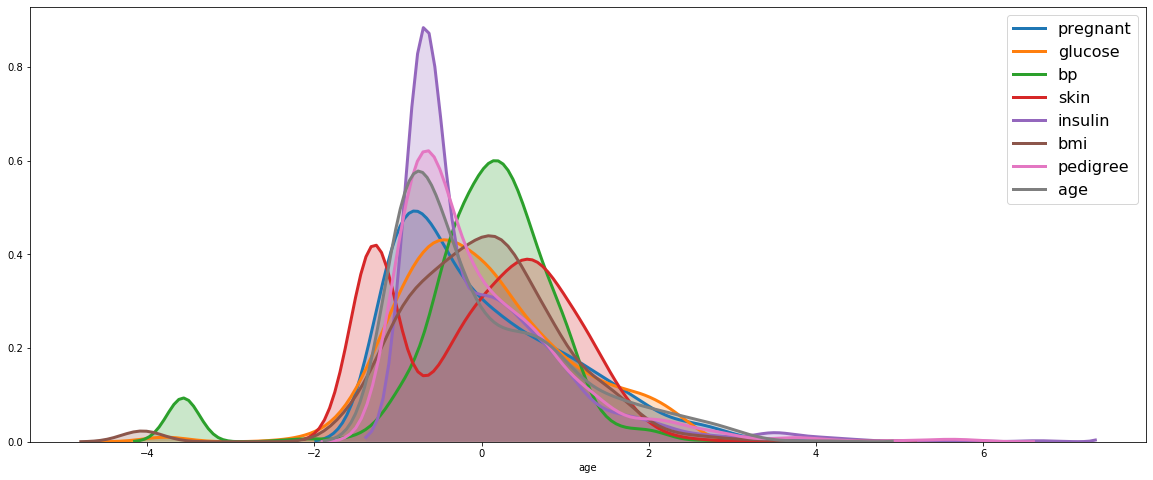

In [40]:
plt.figure(figsize=(20,8))

for i in X_std.columns:
    sns.distplot(X_std[i], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3},label = i)
    
plt.legend(prop={'size': 16})

In [ ]:
'''there is an overlapping zone around -1 to 0  that is causing the redundancy.Lets apply PCA and eliminate
this sigma zone and observe the results.'''

In [41]:
# steps for PCA
from sklearn.decomposition import PCA

model_pca = PCA(n_components=8)
pca_val = model_pca.fit_transform(X_std)
pca_val.shape

(767, 8)

In [42]:
pca_val

array([[-1.11779243, -0.73731873, -0.71325901, ..., -0.40757895,
         0.72819161,  0.40855295],
       [-0.40073495,  1.59486505,  1.76070082, ..., -0.03886237,
        -1.22755974,  0.98288485],
       [-1.10882539, -1.27333811, -0.66250886, ..., -0.41307421,
        -0.02118489, -0.13518053],
       ...,
       [-0.28159201,  0.09775941, -0.07651277, ..., -0.53754162,
        -0.35678312,  0.26332128],
       [-1.06154559,  0.83604582,  0.4261683 , ...,  0.15106377,
         1.21803453, -0.4439487 ],
       [-0.83468251, -1.15451804, -1.00881929, ..., -0.15153282,
         0.20570727,  0.53138061]])

In [43]:
#eigen vectors
eigenvectors=model_pca.components_

In [44]:
# eigen values
eigenvalues=model_pca.explained_variance_

In [45]:
# lets observe the variance each vector is explaining
tot = sum(eigenvalues)
var_exp = [(i/tot)*100 for i in sorted(eigenvalues,reverse=True)]
cum_var = np.cumsum(var_exp)
print("cumulative variance :",cum_var)

cumulative variance : [ 26.17744457  47.82303672  60.69869285  71.64368398  81.17944766
  89.71122306  94.95654988 100.        ]


In [46]:
# lets do  kmeans clustering on pca data and observe the results by changing the number of pcs
from sklearn.cluster import KMeans

m1 = KMeans(n_clusters=2,n_init=15,random_state=2)
m1.fit(pca_val)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=15, n_jobs=None, precompute_distances='auto',
       random_state=2, tol=0.0001, verbose=0)

In [47]:
centroids=m1.cluster_centers_
centroid_df = pd.DataFrame(centroids) # columns = list(X_std_df)
#centroid_df.columns=X.columns
centroid_df

,0,1,2,3,4,5,6,7
0,0.630653,1.413686,0.047389,0.036261,-0.123193,0.017736,0.036296,-0.023698
1,-0.344570,-0.772397,-0.025892,-0.019812,0.067309,-0.009691,-0.019831,0.012948


In [48]:
# inertia
m1.inertia_

5123.048741909526

In [49]:
from sklearn import metrics
metrics.silhouette_score(pca_val,m1.labels_)

0.19579570122151488

In [63]:
# lets do clustering by changing the number of pcs and lets check the scores and the quality of clustering
model_pca5 = PCA(n_components=5)
pca_val5 = model_pca5.fit_transform(X_std)
pca_val5.shape

(767, 5)

In [64]:
m2 = KMeans(n_clusters=2,n_init=15,random_state=2)
m2.fit(pca_val5)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=15, n_jobs=None, precompute_distances='auto',
       random_state=2, tol=0.0001, verbose=0)

In [65]:
centroids5=m2.cluster_centers_
centroid_df5 = pd.DataFrame(centroids5) # columns = list(X_std_df)
#centroid_df.columns=X.columns
centroid_df5

,0,1,2,3,4
0,-0.343260,-0.787413,-0.027927,-0.015554,0.053922
1,0.610655,1.400796,0.049681,0.027671,-0.095926


In [66]:
m2.inertia_

3969.031345332005

In [68]:
metrics.silhouette_score(pca_val5,m2.labels_)

0.2300594698889209

In [56]:
# lets do clustering by changing the number of pcs to 2
model_pca2 = PCA(n_components=2)
pca_val2 = model_pca2.fit_transform(X_std)
pca_val2.shape

(767, 2)

In [57]:
m3 = KMeans(n_clusters=2,n_init=15,random_state=2)
m3.fit(pca_val2)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=15, n_jobs=None, precompute_distances='auto',
       random_state=2, tol=0.0001, verbose=0)

In [58]:
centroids2=m3.cluster_centers_
centroid_df2 = pd.DataFrame(centroids2) # columns = list(X_std_df)
#centroid_df.columns=X.columns
centroid_df2

,0,1
0,0.518168,1.453330
1,-0.286356,-0.803156


In [60]:
m3.inertia_

1925.33209015606

In [61]:
metrics.silhouette_score(pca_val2,m3.labels_)

0.3659583653210343

In [ ]:
'''even though we are getting the least inertia with two components, we are considering only 47% of the data to
build clusters which cant be the ideal and effective way, so we will consider the optimal case of 5 pcs.'''

In [70]:
df_k = df_diabetes.copy(deep=True)
df_k['label'] = m2.labels_

In [71]:
df_k['label'].value_counts()

0    491
1    276
Name: label, dtype: int64

In [73]:
data_original = pd.read_csv('pima-indians-diabetes.data') 
data_original.head()

,6,148,72,35,0,33.6,0.627,50,1
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


In [74]:

data_original.rename(columns={'6':'pregnant', '148':'glucose', '72':'bp', '35':'skin', 
                            '0':'insulin', '33.6':'bmi', '0.627':'pedigree', 
                            '50':'age','1':'label'},inplace=True)

In [75]:
data_original.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


In [78]:
print('Original Data Classes:')
print(data_original['label'].value_counts())
print('-' * 30)
print('Predicted Data Classes with 5 pc components:')
print(df_k.label.value_counts())

Original Data Classes:
0    500
1    267
Name: label, dtype: int64
------------------------------
Predicted Data Classes with 5 pc components:
0    491
1    276
Name: label, dtype: int64


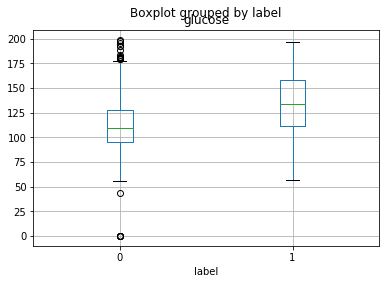

In [80]:
df_k.boxplot(column='glucose',by='label')

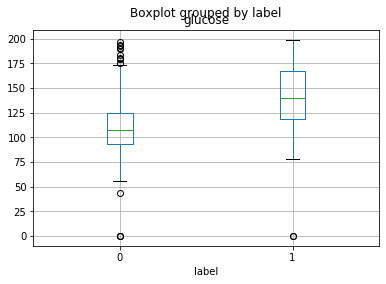

In [81]:
data_original.boxplot(column='glucose',by='label')

In [ ]:
'''the order of class 0 and 1 is the same in the kmeans cluster as well.'''

In [82]:
# no pca
kmeans = KMeans(n_clusters=2,n_init=15,random_state=2)
kmeans.fit(X_std)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=15, n_jobs=None, precompute_distances='auto',
       random_state=2, tol=0.0001, verbose=0)

In [83]:
centroids=kmeans.cluster_centers_
centroid_df = pd.DataFrame(centroids) # columns = list(X_std_df)
#centroid_df.columns=X.columns
centroid_df

,0,1,2,3,4,5,6,7
0,0.960391,0.433134,0.407683,-0.145640,-0.023633,0.118359,0.030579,1.050850
1,-0.524730,-0.236652,-0.222746,0.079573,0.012912,-0.064668,-0.016708,-0.574154


In [84]:
kmeans.inertia_

5123.048741909524

In [85]:
metrics.silhouette_score(X_std,kmeans.labels_)

0.195795701221515

In [86]:
df_k_nopca = df_diabetes.copy(deep=True)
df_k_nopca['label'] = kmeans.labels_

In [87]:
print('Original Data Classes:')
print(data_original['label'].value_counts())
print('-' * 30)
print('Predicted Data Classes with 5 pc components:')
print(df_k.label.value_counts())
print('-' * 30)
print('Predicted Data Classes without pca:')
print(df_k_nopca['label'].value_counts())

Original Data Classes:
0    500
1    267
Name: label, dtype: int64
------------------------------
Predicted Data Classes with 5 pc components:
0    491
1    276
Name: label, dtype: int64
------------------------------
Predicted Data Classes without pca:
1    496
0    271
Name: label, dtype: int64


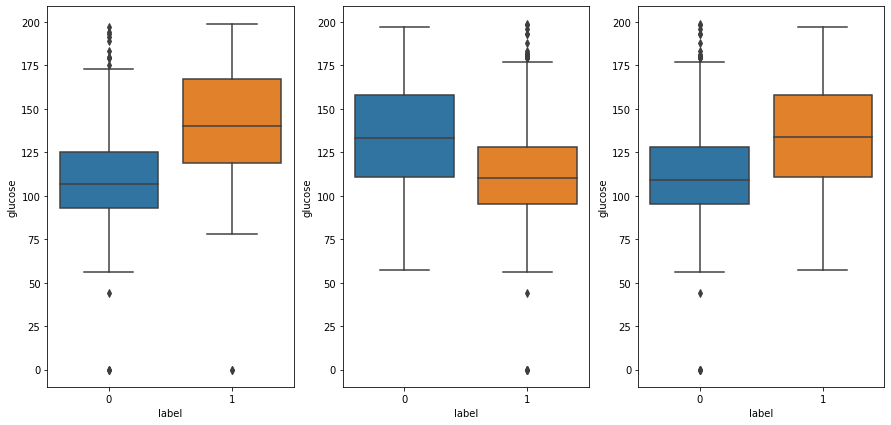

In [94]:
fig,axes = plt.subplots(1,3,figsize=(15,7))
sns.boxplot(x='label',y='glucose',data=data_original,ax=axes[0])
sns.boxplot(x='label',y='glucose',data=df_k_nopca,ax=axes[1])
sns.boxplot(x='label',y='glucose',data=df_k,ax=axes[2])